# **Amazon sentiment Analysis**

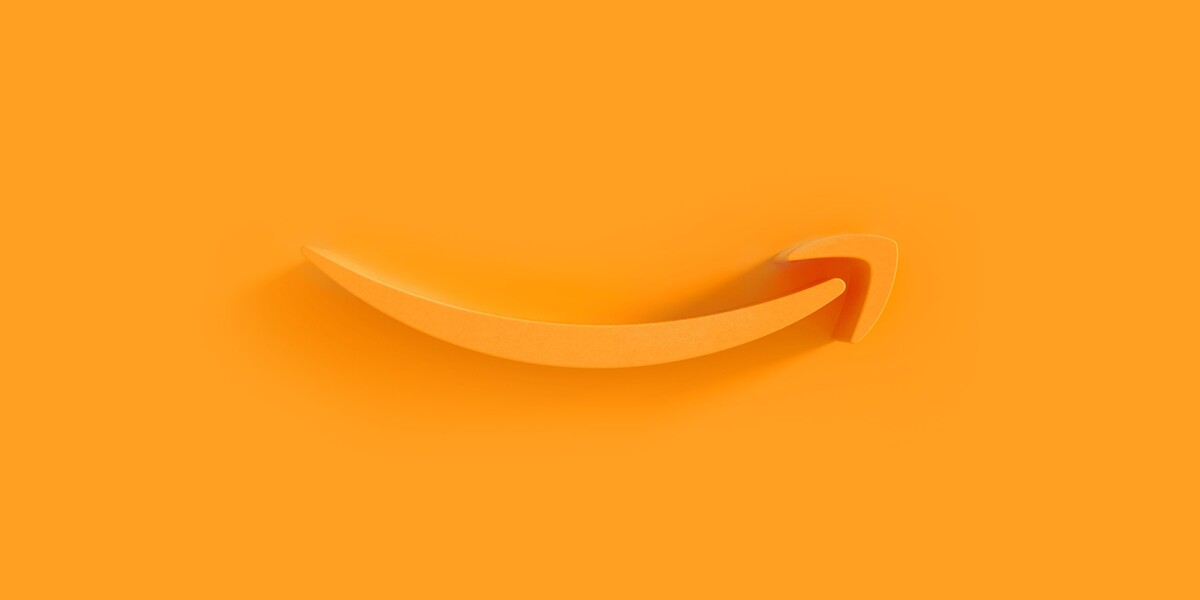

Everyday we come across various products in our lives, on the digital medium we swipe across hundreds of product choices under one category. It will be tedious for the customer to make selection. Here comes 'reviews' where customers who have already got that product leave a rating after using them and brief their experience by giving reviews. As we know ratings can be easily sorted and judged whether a product is good or bad. But when it comes to sentence reviews we need to read through every line to make sure the review conveys a positive or negative sense. In the era of artificial intelligence, things like that have got easy with the Natural Langauge Processing(NLP) technology.

**IMPORT LIBERARIES**

In [212]:
import re 
import numpy as np 
import pandas as pd 
import nltk 
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
from wordcloud import WordCloud
import seaborn as sns 
import matplotlib as plt 
import cufflinks as cf  
%matplotlib inline
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode (connected = True)
cf.go_offline();
import plotly.graph_objs as go 
from plotly.subplots import make_subplots
from nltk.stem import PorterStemmer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

# **Upload data**

In [199]:
df=pd.read_csv('/content/amazon_reviews.csv')
df.head()

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4.0,No issues.,2014-07-23,138,0,0,0,0,0.0,0.0
1,1,0mie,5.0,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0
2,2,1K3,4.0,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0
3,3,1m2,5.0,This think has worked out great.Had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5.0,"Bought it with Retail Packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.0


**Drop unnamed column and make wilson lower bound in descending order**

In [200]:
df=df.sort_values('wilson_lower_bound',ascending=False)
df.drop('Unnamed: 0',inplace=True,axis=1)
df.head()

,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
2031,"Hyoun Kim ""Faluzure""",5.0,[[ UPDATE - 6/19/2014 ]]So my lovely wife boug...,2013-01-05,702,1952,68,2020,1884,0.966337,0.957544
3449,NLee the Engineer,5.0,I have tested dozens of SDHC and micro-SDHC ca...,2012-09-26,803,1428,77,1505,1351,0.948837,0.936519
4212,SkincareCEO,1.0,NOTE: please read the last update (scroll to ...,2013-05-08,579,1568,126,1694,1442,0.925620,0.912139
317,"Amazon Customer ""Kelly""",1.0,"If your card gets hot enough to be painful, it...",2012-02-09,1033,422,73,495,349,0.852525,0.818577
4672,Twister,5.0,Sandisk announcement of the first 128GB micro ...,2014-07-03,158,45,4,49,41,0.918367,0.808109


**Data Exploration**

In [201]:
def missing_values_analysis(df) :
  na_columns_ = [col for col in df.columns if df [col].isnull () .sum() > 0]
  n_miss = df [na_columns_].isnull () . sum() .sort_values(ascending=True)
  ratio_ = (df[na_columns_].isnull().sum() / df.shape[0] * 100).sort_values(ascending=True)
  missing_df = pd.concat([n_miss, np.round(ratio_, 2)], axis=1, keys=['Missing Values','Ratios' ])
  missing_df = pd.DataFrame (missing_df)
  return missing_df
def check_dataframe(dt, head=5, tail=5):
  print ("SHAPE". center (82, '~'))
  print('Rows: {}'.format(df.shape [0]))
  print( 'columns: {}'.format(df.shape[1]))
  print("TYPES" .center (82, '~'))
  print(df.dtypes)
  print(' '. center(82,'~'))
  print (missing_values_analysis (df))
  print('DUPLICATED_VALUES'.center (83,'~'))
  print (df.duplicated() . sum ()) 
  print ("QUANTILES". center (82, '~' ))
  print(df.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]) . T)
check_dataframe (df)

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~SHAPE~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Rows: 4915
columns: 11
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~TYPES~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
reviewerName             object
overall                 float64
reviewText               object
reviewTime               object
day_diff                  int64
helpful_yes               int64
helpful_no                int64
total_vote                int64
score_pos_neg_diff        int64
score_average_rating    float64
wilson_lower_bound      float64
dtype: object
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
              Missing Values  Ratios
reviewerName               1    0.02
reviewText                 1    0.02
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~DUPLICATED_VALUES~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
0
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~QUANTILES~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                       0.00  0.05   0.50        0.95       0.99         1.00
overa

<ipython-input-201-60da8a21a6ab>:19: FutureWarning:

The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [202]:
def check_class(dataframe):
  unique_df=pd.DataFrame ({'Variable': dataframe. columns,
                           'Classes': [dataframe [i].nunique() \
                                       for i in dataframe.columns]})
  unique_df = unique_df.sort_values('Classes',ascending = False)
  unique_df= unique_df.reset_index(drop = True)
  return unique_df
check_class(df)

,Variable,Classes
0,reviewText,4912
1,reviewerName,4594
2,reviewTime,690
3,day_diff,690
4,wilson_lower_bound,40
5,score_average_rating,28
6,score_pos_neg_diff,27
7,total_vote,26
8,helpful_yes,23
9,helpful_no,17


# **Clean The Data**

In [203]:
df.reviewText.head()

2031    [[ UPDATE - 6/19/2014 ]]So my lovely wife boug...
3449    I have tested dozens of SDHC and micro-SDHC ca...
4212    NOTE:  please read the last update (scroll to ...
317     If your card gets hot enough to be painful, it...
4672    Sandisk announcement of the first 128GB micro ...
Name: reviewText, dtype: object

In [204]:
random_review=df.reviewText[2031]
random_review

'[[ UPDATE - 6/19/2014 ]]So my lovely wife bought me a Samsung Galaxy Tab 4 for Father\'s Day and I\'ve been loving it ever since.  Just as other with Samsung products, the Galaxy Tab 4 has the ability to add a microSD card to expand the memory on the device.  Since it\'s been over a year, I decided to do some more research to see if SanDisk offered anything new.  As of 6/19/2014, their product lineup for microSD cards from worst to best (performance-wise) are the as follows:SanDiskSanDisk UltraSanDisk Ultra PLUSSanDisk ExtremeSanDisk Extreme PLUSSanDisk Extreme PRONow, the difference between all of these cards are simply the speed in which you can read/write data to the card.  Yes, the published rating of most all these cards (except the SanDisk regular) are Class 10/UHS-I but that\'s just a rating... Actual real world performance does get better with each model, but with faster cards come more expensive prices.  Since Amazon doesn\'t carry the Ultra PLUS model of microSD card, I had 

**1-Use regular expression to remove puntuality**

In [205]:
random_review=re.sub("[^a-zA-Z]",' ',random_review)
random_review

'   UPDATE               So my lovely wife bought me a Samsung Galaxy Tab   for Father s Day and I ve been loving it ever since   Just as other with Samsung products  the Galaxy Tab   has the ability to add a microSD card to expand the memory on the device   Since it s been over a year  I decided to do some more research to see if SanDisk offered anything new   As of            their product lineup for microSD cards from worst to best  performance wise  are the as follows SanDiskSanDisk UltraSanDisk Ultra PLUSSanDisk ExtremeSanDisk Extreme PLUSSanDisk Extreme PRONow  the difference between all of these cards are simply the speed in which you can read write data to the card   Yes  the published rating of most all these cards  except the SanDisk regular  are Class    UHS I but that s just a rating    Actual real world performance does get better with each model  but with faster cards come more expensive prices   Since Amazon doesn t carry the Ultra PLUS model of microSD card  I had to do

**2-remove capital letters**

In [206]:
random_review = random_review.lower().split()
random_review

['update',
 'so',
 'my',
 'lovely',
 'wife',
 'bought',
 'me',
 'a',
 'samsung',
 'galaxy',
 'tab',
 'for',
 'father',
 's',
 'day',
 'and',
 'i',
 've',
 'been',
 'loving',
 'it',
 'ever',
 'since',
 'just',
 'as',
 'other',
 'with',
 'samsung',
 'products',
 'the',
 'galaxy',
 'tab',
 'has',
 'the',
 'ability',
 'to',
 'add',
 'a',
 'microsd',
 'card',
 'to',
 'expand',
 'the',
 'memory',
 'on',
 'the',
 'device',
 'since',
 'it',
 's',
 'been',
 'over',
 'a',
 'year',
 'i',
 'decided',
 'to',
 'do',
 'some',
 'more',
 'research',
 'to',
 'see',
 'if',
 'sandisk',
 'offered',
 'anything',
 'new',
 'as',
 'of',
 'their',
 'product',
 'lineup',
 'for',
 'microsd',
 'cards',
 'from',
 'worst',
 'to',
 'best',
 'performance',
 'wise',
 'are',
 'the',
 'as',
 'follows',
 'sandisksandisk',
 'ultrasandisk',
 'ultra',
 'plussandisk',
 'extremesandisk',
 'extreme',
 'plussandisk',
 'extreme',
 'pronow',
 'the',
 'difference',
 'between',
 'all',
 'of',
 'these',
 'cards',
 'are',
 'simply',
 

**3-Apply it on all review text column**

In [228]:
rt=lambda x:re.sub("[^a-zA-Z]",' ',str(x))
df['reviewText']=df['reviewText'].map(rt)
df['reviewText']=df['reviewText'].str.lower()
df.head()

,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound,polarity,subjectivity,sentiment
2031,"Hyoun Kim ""Faluzure""",5.0,update so my lovely wife boug...,2013-01-05,702,1952,68,2020,1884,0.966337,0.957544,0.163859,0.562259,Positive
3449,NLee the Engineer,5.0,i have tested dozens of sdhc and micro sdhc ca...,2012-09-26,803,1428,77,1505,1351,0.948837,0.936519,0.103870,0.516435,Positive
4212,SkincareCEO,1.0,note please read the last update scroll to ...,2013-05-08,579,1568,126,1694,1442,0.925620,0.912139,0.212251,0.505394,Positive
317,"Amazon Customer ""Kelly""",1.0,if your card gets hot enough to be painful it...,2012-02-09,1033,422,73,495,349,0.852525,0.818577,0.143519,0.494207,Positive
4672,Twister,5.0,sandisk announcement of the first gb micro ...,2014-07-03,158,45,4,49,41,0.918367,0.808109,0.172332,0.511282,Positive


# **Sentiment Analysis**

In [214]:
df[['polarity','subjectivity']]=df['reviewText'].apply(lambda Text:pd.Series(TextBlob(Text).sentiment))
for index,row in df['reviewText'].iteritems():
  score=SentimentIntensityAnalyzer().polarity_scores(row)
  neg=score['neg']
  neu=score['neu']
  pos=score['pos']
  if neg>pos:
    df.loc[index,'sentiment']='Negative'
  elif pos>neg:
    df.loc[index,'sentiment']='Positive'
  else:
    df.loc[index,'sentiment']='Neutral'


<ipython-input-214-06b9bb14f711>:2: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



In [217]:
df[df['sentiment']=='Positive'].sort_values('wilson_lower_bound',
                                              ascending=False).head(5)

,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound,polarity,subjectivity,sentiment
2031,"Hyoun Kim ""Faluzure""",5.0,update so my lovely wife boug...,2013-01-05,702,1952,68,2020,1884,0.966337,0.957544,0.163859,0.562259,Positive
3449,NLee the Engineer,5.0,i have tested dozens of sdhc and micro sdhc ca...,2012-09-26,803,1428,77,1505,1351,0.948837,0.936519,0.103870,0.516435,Positive
4212,SkincareCEO,1.0,note please read the last update scroll to ...,2013-05-08,579,1568,126,1694,1442,0.925620,0.912139,0.212251,0.505394,Positive
317,"Amazon Customer ""Kelly""",1.0,if your card gets hot enough to be painful it...,2012-02-09,1033,422,73,495,349,0.852525,0.818577,0.143519,0.494207,Positive
4672,Twister,5.0,sandisk announcement of the first gb micro ...,2014-07-03,158,45,4,49,41,0.918367,0.808109,0.172332,0.511282,Positive


# **Visualize the results**

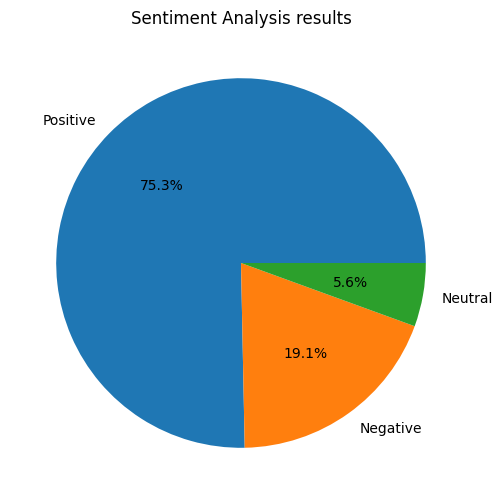

In [227]:
def categorical_variable_summary(dataframe, column_name):
    summary = dataframe[column_name].value_counts().reset_index()
    summary.columns = ['Category', 'Count']
    return summary

# Obtain categorical variable summary
summary_df = categorical_variable_summary(df, 'sentiment')

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(summary_df['Count'], labels=summary_df['Category'], autopct='%1.1f%%')
plt.title('Sentiment Analysis results')
plt.show()